In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup



In [2]:
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0'
}
webpage=requests.get("https://www.ambitionbox.com/list-of-companies?page=1",headers=headers).text


In [3]:
soup=BeautifulSoup(webpage,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   List of companies - 756.9k companies | AmbitionBox
  </title>
  <meta content="2022 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/
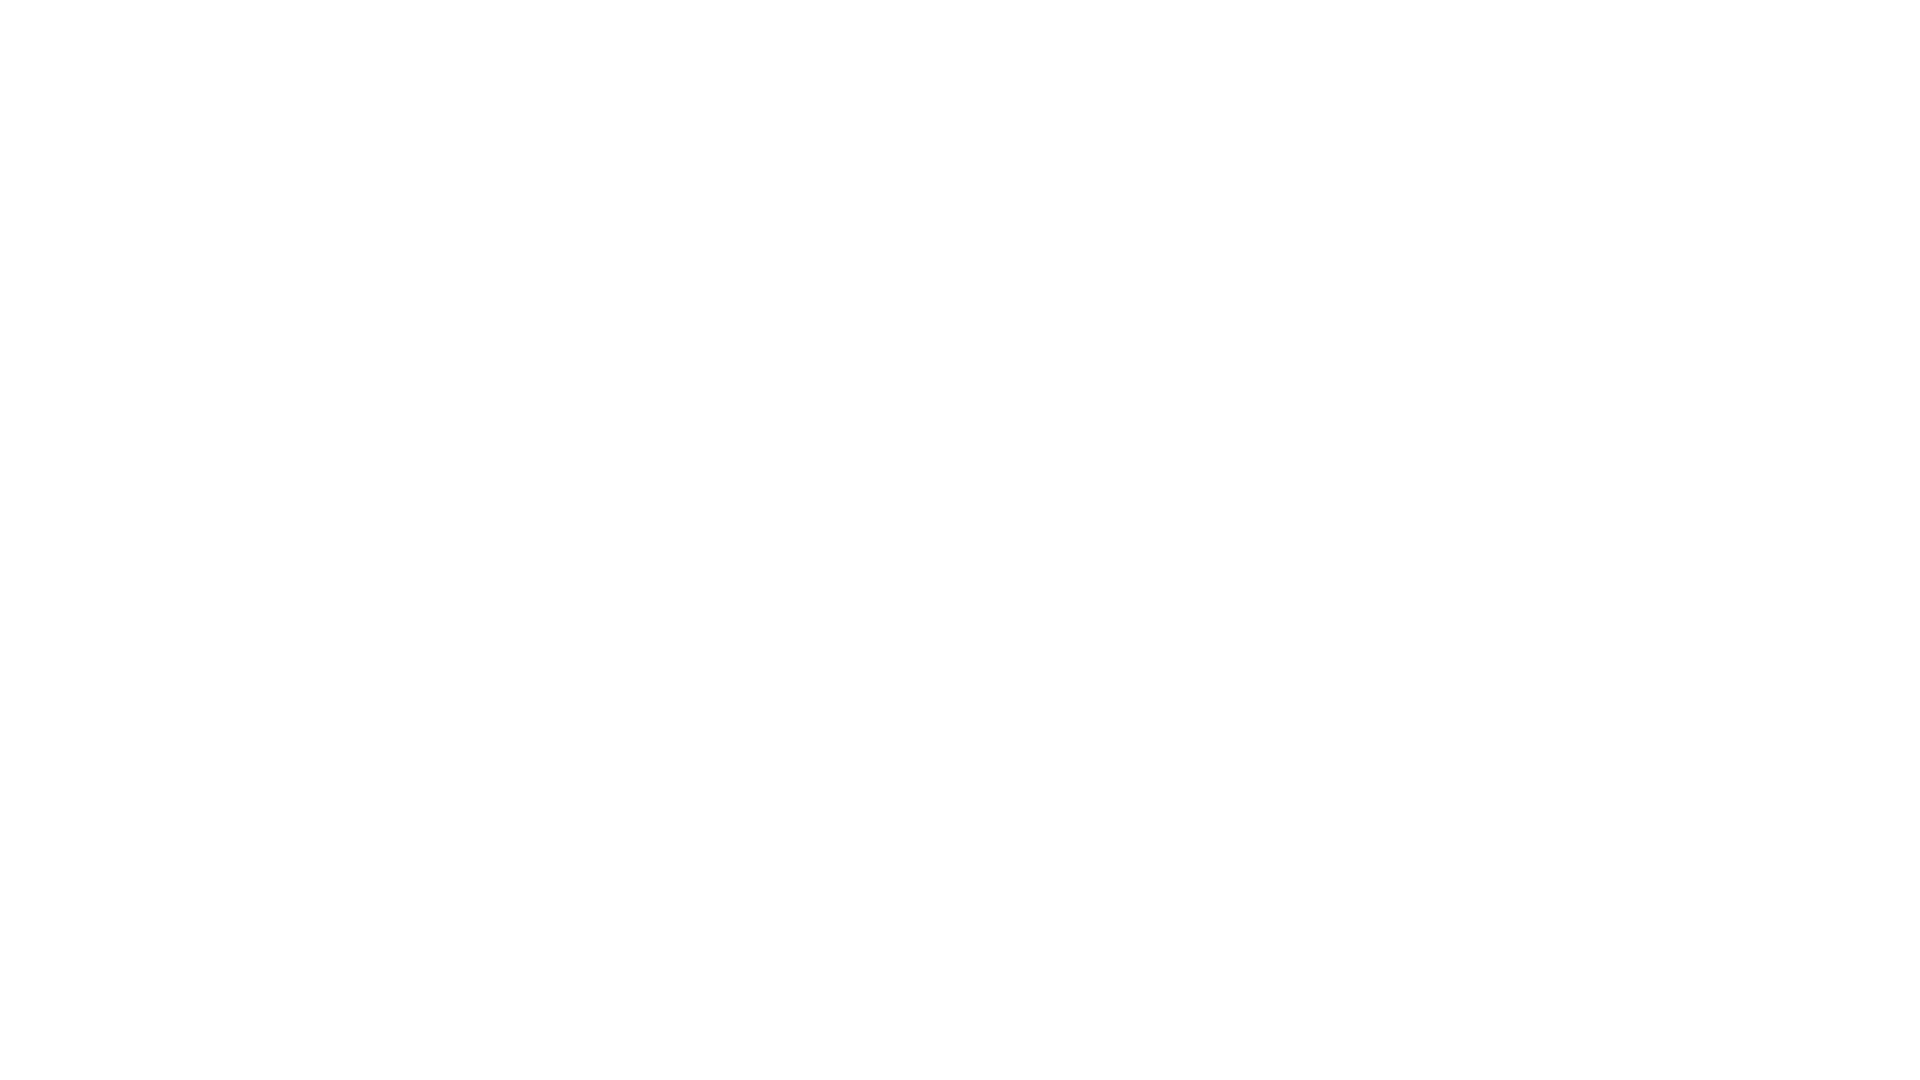

In [19]:
print(soup.prettify())

In [20]:
soup.find_all('h1')[0].text

'List of companies in India'

In [6]:
 for i in soup.find_all('h2'):
        print(i.text.strip())

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
IBM
Concentrix Corpo...
Reliance jio
Larsen & Toubro ...
Vodafone Idea
HDB Financial Se...
Teleperformance
Kotak Mahindra B...
Reliance Industr...
Bharti Airtel
Reliance Retail
Deloitte
Tata Motors
BYJU'S
WNS
Mahindra & Mahin...
Flipkart


In [7]:
company= soup.find_all("div",class_="company-content-wrapper")

In [8]:
len(company)

30

In [9]:
name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
old=[]
employee=[]
for i in company:
    name.append(i.find('h2').text.strip())
    rating.append(i.find('p',class_='rating').text.strip())
    reviews.append(i.find('a',class_='review-count').text.strip())
    ctype.append(i.find_all('p',class_="infoEntity" )[0].text.strip())
    hq.append(i.find_all('p',class_="infoEntity" )[1].text.strip())
    old.append(i.find_all('p',class_="infoEntity" )[2].text.strip())
    employee.append(i.find_all('p',class_="infoEntity" )[3].text.strip())
    
d={'Name':name,'rateing':rating,'reviews':reviews,'company_type':ctype,'headqurter':hq,'old':old,'employee':employee}
df=pd.DataFrame(d)
df

,Name,rateing,reviews,company_type,headqurter,old,employee
0,TCS,3.9,(50.5k Reviews),Public,"Mumbai,Maharashtra + 278 more",54 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.8k Reviews),Public,Dublin + 142 more,33 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(30k Reviews),Private,Teaneck. New Jersey. + 100 more,28 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(35.2k Reviews),Public,"Mumbai,Maharashtra + 1046 more",28 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(40.3k Reviews),Public,"Mumbai,Maharashtra + 1225 more",28 years old,1 Lakh+ Employees (India)
5,Wipro,3.9,(29.1k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 231 more",77 years old,1 Lakh+ Employees (India)
6,Infosys,3.9,(28.6k Reviews),Public,"Bengaluru/Bangalore,Karnataka + 126 more",41 years old,1 Lakh+ Employees (India)
7,Capgemini,3.9,(24.3k Reviews),Public,Paris + 80 more,55 years old,1 Lakh+ Employees (India)
8,Tech Mahindra,3.7,(22.1k Reviews),Public,"Pune,Maharashtra + 217 more",36 years old,50k-1 Lakh Employees (India)
9,Genpact,4.0,(21.3k Reviews),Public,"New York,New York + 67 more",25 years old,50k-1 Lakh Employees (India)


In [10]:
final=pd.DataFrame()
for j in range(1,333):
    url="https://www.ambitionbox.com/list-of-companies?page={}".format(j)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0'}           
    webpage=requests.get(url,headers=headers).text
    soup=BeautifulSoup(webpage,'lxml')
    name=[]
    rating=[]
    reviews=[]
    ctype=[]
    hq=[]
    old=[]
    employee=[]
    for i in company:
        name.append(i.find('h2').text.strip())
        rating.append(i.find('p',class_='rating').text.strip())
        reviews.append(i.find('a',class_='review-count').text.strip())
        ctype.append(i.find_all('p',class_="infoEntity" )[0].text.strip())
        hq.append(i.find_all('p',class_="infoEntity" )[1].text.strip())
        old.append(i.find_all('p',class_="infoEntity" )[2].text.strip())
        employee.append(i.find_all('p',class_="infoEntity" )[3].text.strip())

    d={'Name':name,'rateing':rating,'reviews':reviews,'company_type':ctype,'headqurter':hq,'old':old,'employee':employee}
    df=pd.DataFrame(d)
    final=final.append(df,ignore_index=True)


C:\Users\Shailesh\AppData\Local\Temp\ipykernel_2952\594623193.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df,ignore_index=True)


In [11]:
final

,Name,rateing,reviews,company_type,headqurter,old,employee
0,TCS,3.9,(50.5k Reviews),Public,"Mumbai,Maharashtra + 278 more",54 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.8k Reviews),Public,Dublin + 142 more,33 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(30k Reviews),Private,Teaneck. New Jersey. + 100 more,28 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(35.2k Reviews),Public,"Mumbai,Maharashtra + 1046 more",28 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(40.3k Reviews),Public,"Mumbai,Maharashtra + 1225 more",28 years old,1 Lakh+ Employees (India)
...,...,...,...,...,...,...,...
9955,Tata Motors,4.1,(12.6k Reviews),Public,"Pune,Maharashtra + 394 more",77 years old,10k-50k Employees (India)
9956,BYJU'S,3.5,(12.4k Reviews),Private,"Bangalore,Karnataka + 215 more",11 years old,1k-5k Employees (India)
9957,WNS,3.7,(7.1k Reviews),Private,"Mumbai,Maharashtra + 23 more",26 years old,10k-50k Employees (India)
9958,Mahindra & Mahin...,3.9,(40.1k Reviews),Public,"Mumbai,Maharashtra + 410 more",77 years old,1 Lakh+ Employees (India)


In [13]:
final.shape

(9960, 7)

In [67]:
final

,Name,rateing,reviews,company_type,headqurter,old,employee,name
0,TCS,3.9,(49.9k Reviews),Public,"Mumbai,Maharashtra + 276 more",54 years old,1 Lakh+ Employees (India),capgemini
1,Accenture,4.1,(32.5k Reviews),Public,Dublin + 141 more,33 years old,1 Lakh+ Employees (India),capgemini
2,Cognizant,3.9,(29.7k Reviews),Private,Teaneck. New Jersey. + 98 more,28 years old,1 Lakh+ Employees (India),capgemini
3,ICICI Bank,4.0,(35k Reviews),Public,"Mumbai,Maharashtra + 1043 more",28 years old,1 Lakh+ Employees (India),capgemini
4,HDFC Bank,4.0,(40k Reviews),Public,"Mumbai,Maharashtra + 1220 more",28 years old,1 Lakh+ Employees (India),capgemini
...,...,...,...,...,...,...,...,...
9955,Tata Motors,4.1,(12.5k Reviews),Public,"Pune,Maharashtra + 391 more",77 years old,10k-50k Employees (India),capgemini
9956,BYJU'S,3.5,(12k Reviews),Private,"Bangalore,Karnataka + 204 more",11 years old,1k-5k Employees (India),capgemini
9957,WNS,3.7,(7k Reviews),Private,"Mumbai,Maharashtra + 22 more",26 years old,10k-50k Employees (India),capgemini
9958,Mahindra & Mahin...,3.9,(39.8k Reviews),Public,"Mumbai,Maharashtra + 410 more",77 years old,1 Lakh+ Employees (India),capgemini


In [15]:
df=pd.DataFrame(final)

In [16]:
df


,Name,rateing,reviews,company_type,headqurter,old,employee
0,TCS,3.9,(50.5k Reviews),Public,"Mumbai,Maharashtra + 278 more",54 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.8k Reviews),Public,Dublin + 142 more,33 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(30k Reviews),Private,Teaneck. New Jersey. + 100 more,28 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(35.2k Reviews),Public,"Mumbai,Maharashtra + 1046 more",28 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(40.3k Reviews),Public,"Mumbai,Maharashtra + 1225 more",28 years old,1 Lakh+ Employees (India)
...,...,...,...,...,...,...,...
9955,Tata Motors,4.1,(12.6k Reviews),Public,"Pune,Maharashtra + 394 more",77 years old,10k-50k Employees (India)
9956,BYJU'S,3.5,(12.4k Reviews),Private,"Bangalore,Karnataka + 215 more",11 years old,1k-5k Employees (India)
9957,WNS,3.7,(7.1k Reviews),Private,"Mumbai,Maharashtra + 23 more",26 years old,10k-50k Employees (India)
9958,Mahindra & Mahin...,3.9,(40.1k Reviews),Public,"Mumbai,Maharashtra + 410 more",77 years old,1 Lakh+ Employees (India)


In [17]:
df.to_csv("companyInfo.csv")


In [18]:
df.head(1000)

,Name,rateing,reviews,company_type,headqurter,old,employee
0,TCS,3.9,(50.5k Reviews),Public,"Mumbai,Maharashtra + 278 more",54 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.8k Reviews),Public,Dublin + 142 more,33 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(30k Reviews),Private,Teaneck. New Jersey. + 100 more,28 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(35.2k Reviews),Public,"Mumbai,Maharashtra + 1046 more",28 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(40.3k Reviews),Public,"Mumbai,Maharashtra + 1225 more",28 years old,1 Lakh+ Employees (India)
...,...,...,...,...,...,...,...
995,Wipro,3.9,(29.1k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 231 more",77 years old,1 Lakh+ Employees (India)
996,Infosys,3.9,(28.6k Reviews),Public,"Bengaluru/Bangalore,Karnataka + 126 more",41 years old,1 Lakh+ Employees (India)
997,Capgemini,3.9,(24.3k Reviews),Public,Paris + 80 more,55 years old,1 Lakh+ Employees (India)
998,Tech Mahindra,3.7,(22.1k Reviews),Public,"Pune,Maharashtra + 217 more",36 years old,50k-1 Lakh Employees (India)
